In [33]:
import soundfile as sf
from qwen_tts import Qwen3TTSTokenizer
import torch
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
tokenizer = Qwen3TTSTokenizer.from_pretrained(
    "Qwen/Qwen3-TTS-Tokenizer-12Hz",
    device_map="cuda:0",
)

In [131]:
enc = tokenizer.encode("/kaggle/eden_tts/LJSpeech-1.1/wavs/LJ001-0002.wav")
wavs, sr = tokenizer.decode(enc)
sf.write("decode_output.wav", wavs[0], sr)

In [129]:
enc

Qwen3TTSTokenizerV2EncoderOutput(audio_codes=[tensor([[1221, 1701,  894,  ..., 1155, 1718,  231],
        [ 678, 1510,  164,  ..., 1000,  472, 2009],
        [1925,  143, 1615,  ...,  372,  720, 1630],
        ...,
        [1841, 1666, 1096,  ...,  889, 1213,  901],
        [ 859, 1666, 1096,  ..., 1838, 1213,  901],
        [   2,  957,   15,  ...,  344, 1008, 1435]], device='cuda:0')])

In [ ]:
torch.norm(enc[0][0].float(), dim=1).shape
new_enc = enc[0][0].float()/2048
new_enc.T.cpu().numpy()

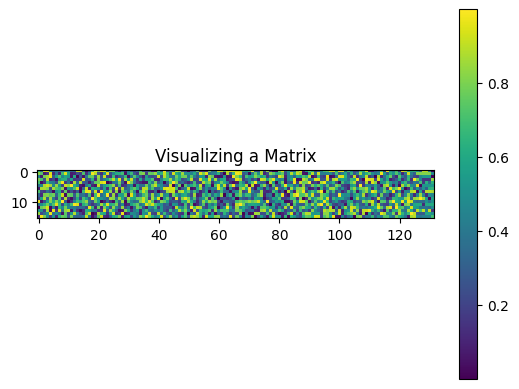

In [121]:

plt.imshow(new_enc.cpu().T, cmap='viridis') # 'viridis', 'magma', 'inferno' là các màu phổ biến
plt.colorbar() # Hiển thị thanh chú thích màu sắc (color scale)
plt.title("Visualizing a Matrix")
plt.show()

Shape của ma trận Mel: torch.Size([1, 80, 991])


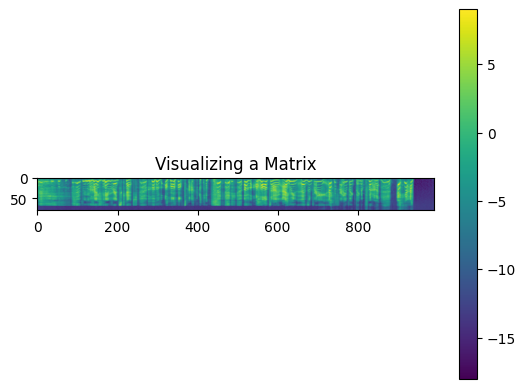

In [37]:
import torchaudio
import torchaudio.transforms as T
import torch

waveform, sample_rate = torchaudio.load("/kaggle/eden_tts/decode_output.wav")
n_fft = 1024
hop_length = 256
n_mels = 80 

mel_spectrogram = T.MelSpectrogram(
    sample_rate=sample_rate,
    n_fft=n_fft,
    hop_length=hop_length,
    n_mels=n_mels,
    center=True,
    pad_mode="reflect",
    power=2.0,
)

mel_spec = mel_spectrogram(waveform)

log_mel_spec = torch.log(mel_spec + 1e-9)

print(f"Shape của ma trận Mel: {log_mel_spec.shape}") 

plt.imshow(log_mel_spec[0], cmap='viridis') # 'viridis', 'magma', 'inferno' là các màu phổ biến
plt.colorbar() # Hiển thị thanh chú thích màu sắc (color scale)
plt.title("Visualizing a Matrix")
plt.show()

In [56]:
codes = enc.audio_codes[0]
codes[:16].shape

torch.Size([16, 16])

In [89]:
def concat_waveforms(codes, st, en):
    OutputClass = enc.__class__
    new_output = OutputClass(audio_codes=[codes[st:en]])
    wavs, sr = tokenizer.decode(new_output)
    return wavs[0]

In [91]:
merge_audio = np.concatenate([concat_waveforms(codes, 0, 16)[:30720//2], 
(concat_waveforms(codes, 8, 24)[:30720//2] + concat_waveforms(codes, 0, 16)[30720//2:])/2,
concat_waveforms(codes, 8, 24)[30720//2:]])
merge_audio.shape

(46080,)

In [92]:
sf.write("merge_decode_output.wav", merge_audio, sr)

In [132]:
import numpy as np

mask = np.load("/kaggle/eden_tts/data/ljs/mel/LJ001-0001.npy")
mask.shape

(16, 121)

In [ ]:
from utils.dsp import *
y = load_wav("/kaggle/eden_tts/decode_output.wav")
print(f"Loaded /kaggle/eden_tts/decode_output.wav with shape {y.shape} and sample rate {hp.sample_rate}")
peak = np.abs(y).max()
y /= peak
enc = tokenizer.encode("https://qianwen-res.oss-cn-beijing.aliyuncs.com/Qwen3-TTS-Repo/tokenizer_demo_1.wav")
torch.norm(enc[0][0].float(), dim=1).shape
new_enc = enc[0][0].float()/torch.norm(enc[0][0].float(), dim=1, keepdim=True)
print(new_enc.T)



mel = melspectrogram(y, np=True)   

Loaded /kaggle/eden_tts/decode_output.wav with shape (28224,) and sample rate 22050
-0.8859083


In [ ]:
tokenizer.encode("https://qianwen-res.oss-cn-beijing.aliyuncs.com/Qwen3-TTS-Repo/tokenizer_demo_1.wav")

In [112]:
# mel = np.load("/kaggle/eden_tts/data/ljs/mel/LJ001-0001.npy")
#Tinh norm cua mel bang numpy
mel.min()
# mel_norm = np.linalg.norm(mel, axis=0, keepdims=True)
# mel_norm
# mel

np.float32(-9.836206)

In [101]:
phone = np.load("/kaggle/eden_tts/data/ljs/phone/LJ001-0001.npy")
phone

array([11, 53, 55, 46, 51, 57, 46, 51, 44,  6, 11, 46, 51, 11, 57, 45, 42,
       11, 52, 51, 49, 62, 11, 56, 42, 51, 56, 42, 11, 60, 46, 57, 45, 11,
       60, 45, 46, 40, 45, 11, 60, 42, 11, 38, 55, 42, 11, 38, 57, 11, 53,
       55, 42, 56, 42, 51, 57, 11, 40, 52, 51, 40, 42, 55, 51, 42, 41,  6,
       11, 41, 46, 43, 43, 42, 55, 56, 11, 43, 55, 52, 50, 11, 50, 52, 56,
       57, 11, 46, 43, 11, 51, 52, 57, 11, 43, 55, 52, 50, 11, 38, 49, 49,
       11, 57, 45, 42, 11, 38, 55, 57, 56, 11, 38, 51, 41, 11, 40, 55, 38,
       43, 57, 56, 11, 55, 42, 53, 55, 42, 56, 42, 51, 57, 42, 41, 11, 46,
       51, 11, 57, 45, 42, 11, 42, 61, 45, 46, 39, 46, 57, 46, 52, 51,  7])

In [96]:
quant = np.load("/kaggle/eden_tts/data/ljs/quant/LJ001-0001.npy")
quant.shape

(212893,)

In [98]:
212893/831

256.18892900120335